<center>
<img src="https://storage.googleapis.com/adonaivera_certified/banner.png">
    
##  Diplomado en Ciencia de Datos - Cohorte 2024

Author: [Adonai Vera](https://www.linkedin.com/in/adonai-vera/) & [Jose Bohorquez](https://www.linkedin.com/in/jos%C3%A9-daniel-boh%C3%B3rquez-guerra-5bba281b3/) 

# ¿Podemos detectar patrones entre consumidores específicos para identificar posibles fraudes?

<p>The famous statistician George E.P. Box once stated:</p>

$$\text{"All models are wrong, but some models are useful."}$$


## Metas (2 min)

Al final de este caso, estará familiarizado con $k$-means como algoritmo de agrupamiento. Específicamente, aprenderá el algoritmo detrás de $k$-means para intuir mejor cuándo funciona bien y cuándo no.

Durante el estudio de caso, realizará EDA en su conjunto de datos y observará una agrupación natural en los datos. Luego se le presentará $k$-means como una forma de automatizar este proceso. Luego, lo implementará y ajustará el algoritmo para validar sus hallazgos. Ser capaz de analizar algoritmos y ajustar sus datos al algoritmo es una habilidad importante para cualquier científico de datos.

## Introducción (5 min)

**Contexto empresarial.** Usted trabaja para el equipo de fraude de una gran compañía de seguros que se ocupa de la emisión de pólizas de seguro para diversos tipos de reclamaciones tanto para particulares como para empresas. Se realiza un seguimiento de las pólizas emitidas y se examinan y evalúan todos los reclamos presentados para determinar la legitimidad y la aprobación final del pago por parte de la compañía de seguros. Sin embargo, muchas personas intentan aprovecharse y presentan reclamaciones con falsos pretextos para obtener ingresos adicionales. La función del equipo antifraude es determinar qué reclamaciones presentadas deben aprobarse y cuáles deben rechazarse.

**Problema comercial.** Su tarea es responder la siguiente pregunta: **¿Existen patrones particulares en los grupos de reclamos presentados que puedan ser indicativos de fraude?**

**Contexto analítico.** El equipo de contabilidad le ha proporcionado datos sobre todas las reclamaciones recientes realizadas por 1000 personas. A diferencia de casos anteriores, los datos aquí no estarán etiquetados; es decir, no hay ninguna variable que nos diga cuáles de estas afirmaciones son fraudulentas o no. Como resultado, los modelos de clasificación que hemos estado usando hasta ahora no se pueden utilizar. En su lugar, debemos utilizar **modelos de agrupación** para abordar este problema de **aprendizaje no supervisado**.

El caso se estructura de la siguiente manera:

1. Realizar un análisis de datos exploratorio para investigar visualmente la estructura de los datos.
2. Utilizar estas observaciones para guiar nuestra metodología de agrupación y ajustar los modelos apropiados
3. Discutir las ventajas y limitaciones de los métodos típicos de agrupación; y finalmente
4. Segmentar y generar conclusiones sobre grupos particulares

## Análisis exploratorio (15 min)

In [1]:
# Importing all the required packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import sklearn

from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler

%matplotlib inline

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

import warnings
warnings.filterwarnings('ignore')

<IPython.core.display.Javascript object>

Comencemos importando los datos disponibles y mirando las primeras filas:

In [3]:
# Download the data
#wget https://storage.googleapis.com/platzi-tf2/insurance_data_1000.xlsx

!curl -O https://storage.googleapis.com/platzi-tf2/insurance_data_1000.xlsx # Windows


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0curl: (6) Could not resolve host: storage.googleapis.com
curl: (3) URL rejected: No host part in the URL
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0curl: (6) Could not resolve host: Windows


In [4]:
# Importing the data, need the xlrd package

df_data = pd.read_excel('insurance_data_1000.xlsx')
df_data.head(10)

,case_id,income,age,sex,approval,fraud,claims
0,59982,35750.95,42,M,Approved,Under Review,9518.95
1,87249,24078.27,19,M,Denied,No,19354.23
2,50406,39241.52,37,M,Denied,Fraud,13056.04
3,59391,33248.31,26,M,Approved,No,19238.37
4,96622,38649.96,54,M,Approved,No,14427.42
5,56519,39001.26,43,F,Denied,No,14659.06
6,89783,36862.26,46,F,Approved,No,11390.09
7,99992,42827.23,47,F,Denied,No,17272.75
8,40096,34838.49,25,M,Approved,No,13164.17
9,1710,34714.20,27,F,Approved,No,11267.48


# Preguntas:

### Vemos que el conjunto de datos contiene una columna "fraud". Realice un análisis exploratorio básico para comparar las afirmaciones fraudulentas/legítimas en los datos. ¿Qué ves? ¿Ves alguna diferencia entre los grupos?

--------

Primero, podemos echar un vistazo a algunas estadísticas básicas de reclamaciones legítimas y fraudulentas:

In [5]:
# Seleccionar solo las columnas numéricas, excluyendo 'fraud'
numeric_cols = df_data.select_dtypes(include=np.number).drop(columns=['fraud'], errors='ignore')

# Calcular la media y la desviación estándar para las columnas numéricas
fraud_mean = numeric_cols.groupby(df_data['fraud']).mean()
fraud_stdev = numeric_cols.groupby(df_data['fraud']).std()

# Imprimir los resultados
print(fraud_mean)
print(fraud_stdev)


"""
#First we may check out the means across the different groups:
fraud_mean=df_data.groupby('fraud').mean()
fraud_stdev=df_data.groupby('fraud').std()
print(fraud_mean)
print(fraud_stdev)
"""

                   case_id        income        age        claims
fraud                                                            
Fraud         43787.739130  46803.717304  40.921739  14024.738522
No            50252.966265  45854.392169  40.375904  13194.549181
Under Review  48235.000000  52175.336000  45.563636  12486.826727
                   case_id        income        age       claims
fraud                                                           
Fraud         28320.101889  22092.369036  13.408656  8859.365261
No            29228.962165  21573.767840  14.561326  7963.349915
Under Review  27787.708824  26182.524826  15.732443  8457.996444


"\n#First we may check out the means across the different groups:\nfraud_mean=df_data.groupby('fraud').mean()\nfraud_stdev=df_data.groupby('fraud').std()\nprint(fraud_mean)\nprint(fraud_stdev)\n"

Vemos algunas ligeras diferencias en los ingresos entre los grupos. Parece que los reclamos fraudulentos tienden a ser alrededor de $800 más grandes que los reclamos legítimos. Las edades parecen ser las mismas, excepto en los grupos analizados (que parecen ser mayores).


Sin embargo, observe que las desviaciones estándar son bastante grandes.

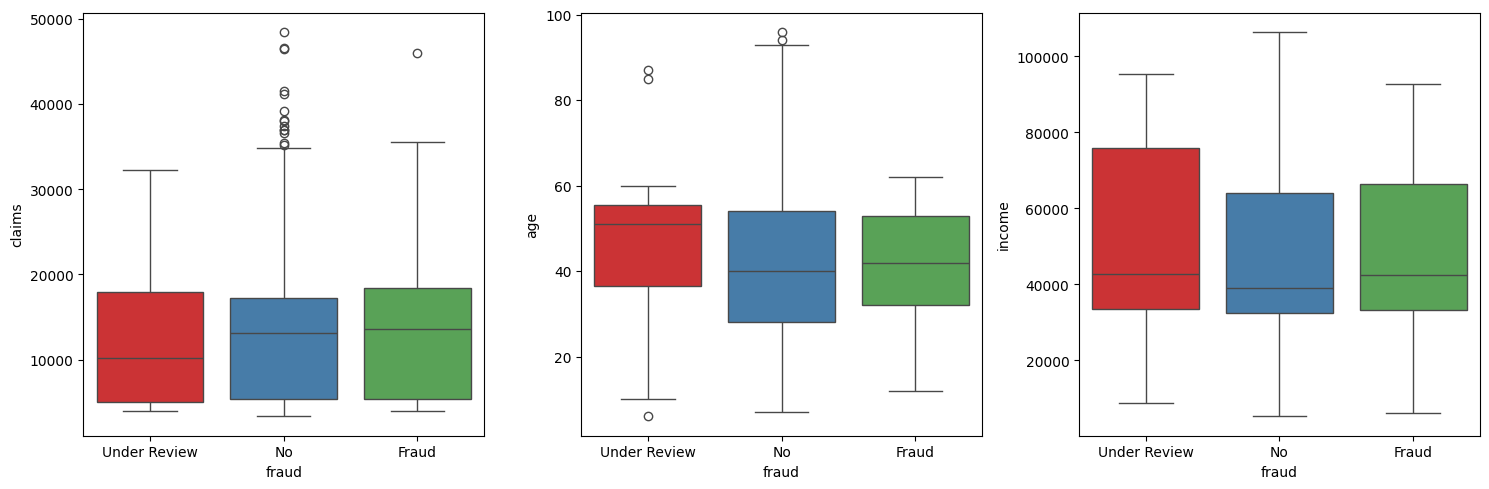

In [6]:
"""fig, ax=plt.subplots(1,3, figsize=(15,5))
sns.boxplot(x='fraud', y='claims',data=df_data,ax=ax[0])
sns.boxplot(x='fraud', y='age',data=df_data, ax=ax[1])
sns.boxplot(x='fraud', y='income',data=df_data, ax=ax[2])
fig.tight_layout()"""

# Crear los boxplots con la asignación de hue y legend=False
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x='fraud', y='claims', data=df_data, ax=ax[0], hue='fraud', palette='Set1', legend=False)
sns.boxplot(x='fraud', y='age', data=df_data, ax=ax[1], hue='fraud', palette='Set1', legend=False)
sns.boxplot(x='fraud', y='income', data=df_data, ax=ax[2], hue='fraud', palette='Set1', legend=False)
fig.tight_layout()

d:\PROYECTO DIVERSIFICACION DE INGRESOS\Proyecto Ado\CURSO\Notebooks\env\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
d:\PROYECTO DIVERSIFICACION DE INGRESOS\Proyecto Ado\CURSO\Notebooks\env\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.git

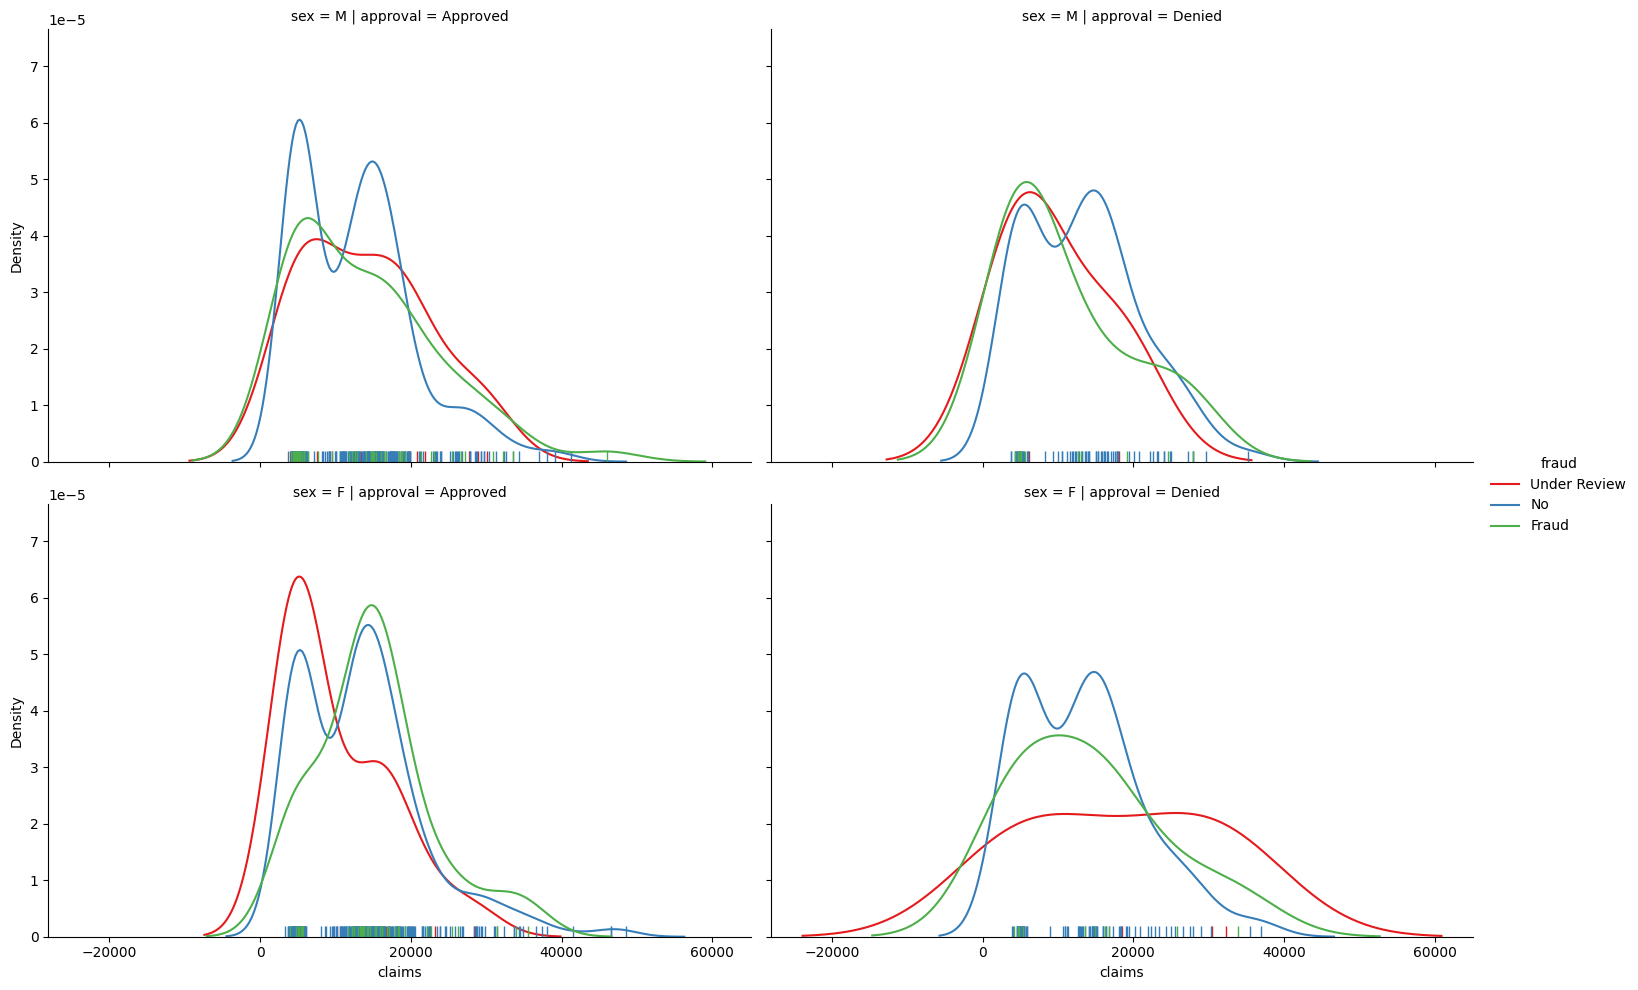

In [7]:
g = sns.FacetGrid(df_data, col='approval',row='sex', hue='fraud', palette="Set1",height=5, aspect=1.5 )
g = (g.map(sns.distplot, "claims", hist=False, rug=True))
g.add_legend()

Vemos algunas ligeras diferencias en las distribuciones. Vemos que las reclamaciones parecen ser bimodales. Tenga en cuenta que las reclamaciones fraudulentas en los hombres tienden a rondar los $\$5000$, pero para las mujeres rondan los $\$17000$. También vemos algunas diferencias entre el grupo de reclamaciones denegadas y aprobadas.

d:\PROYECTO DIVERSIFICACION DE INGRESOS\Proyecto Ado\CURSO\Notebooks\env\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
d:\PROYECTO DIVERSIFICACION DE INGRESOS\Proyecto Ado\CURSO\Notebooks\env\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.git

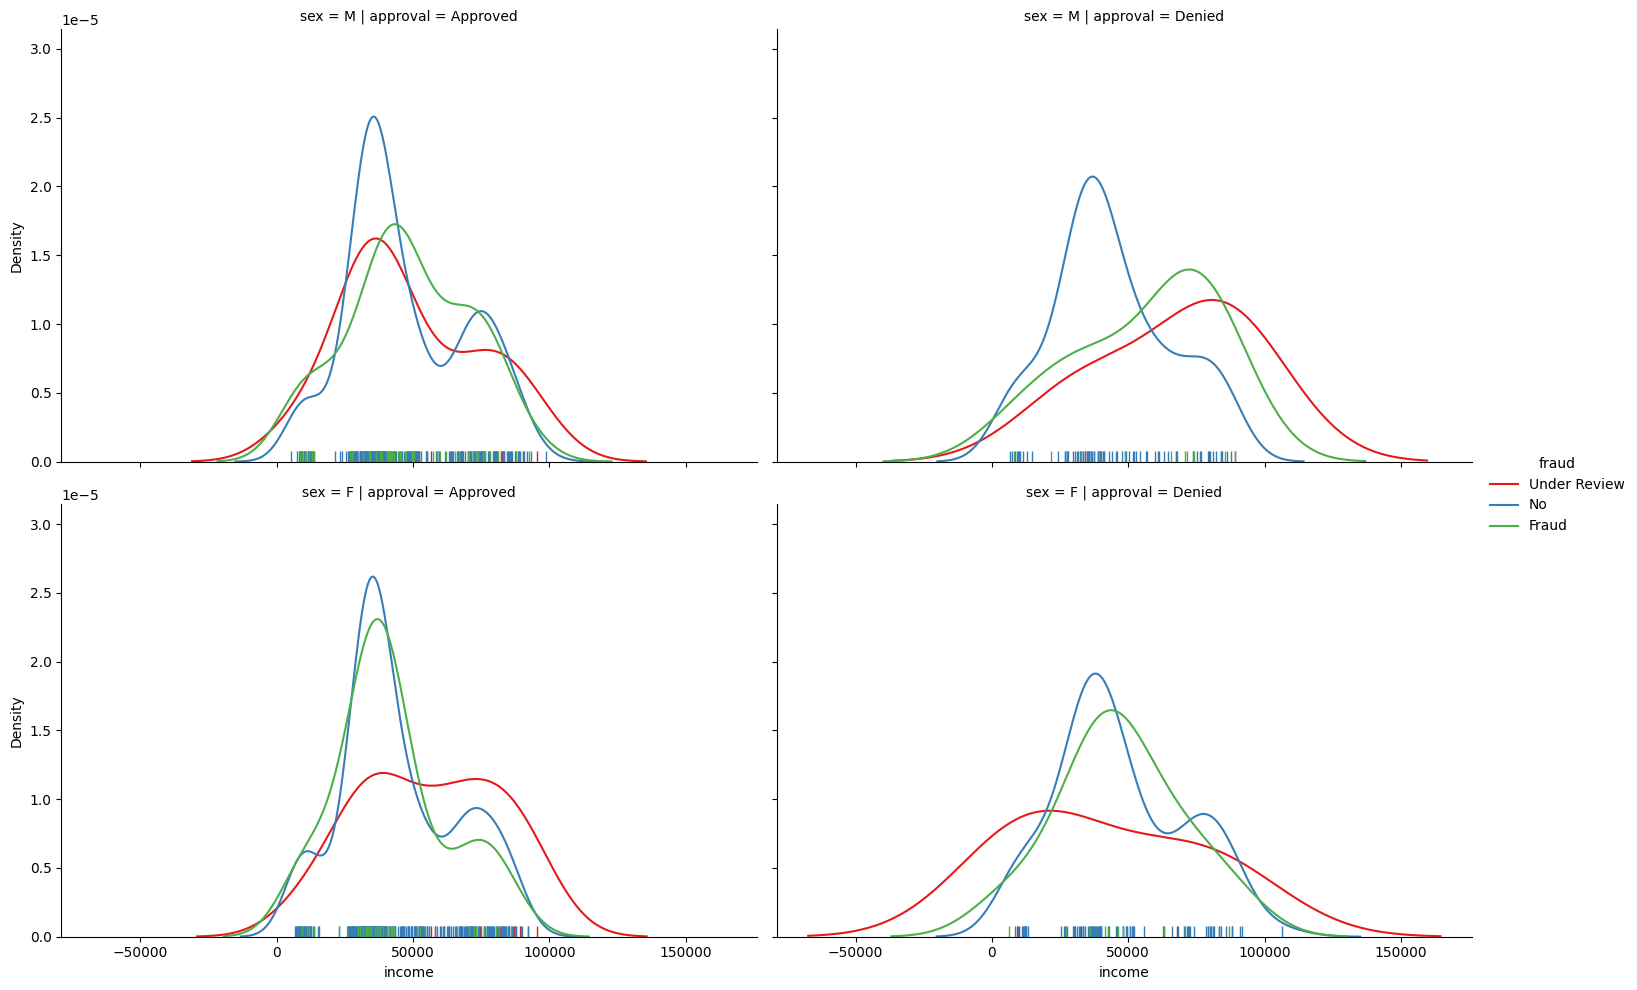

In [8]:
g = sns.FacetGrid(df_data, row='sex',col='approval', hue='fraud', palette="Set1",height=5, aspect=1.5 )
g = (g.map(sns.distplot, "income", hist=False, rug=True))
g.add_legend()

d:\PROYECTO DIVERSIFICACION DE INGRESOS\Proyecto Ado\CURSO\Notebooks\env\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
d:\PROYECTO DIVERSIFICACION DE INGRESOS\Proyecto Ado\CURSO\Notebooks\env\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.git

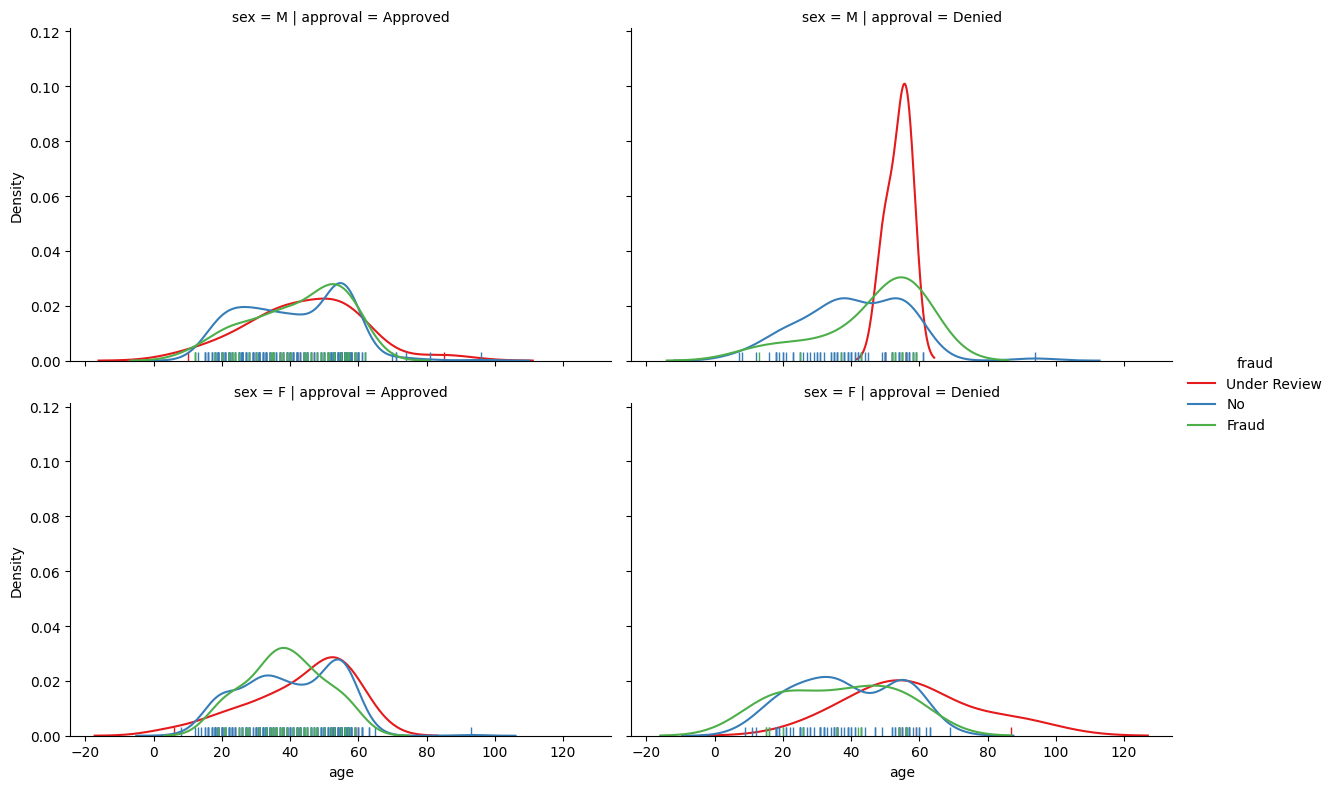

In [9]:
g = sns.FacetGrid(df_data, col='approval',row='sex', hue='fraud', palette="Set1",height=4, aspect=1.5 )
g = (g.map(sns.distplot, "age", hist=False, rug=True))
g.add_legend()

**Revisemos el gráfico "ingresos" versus "reclamo" y "ingresos versus edad" en todos los reclamos:**

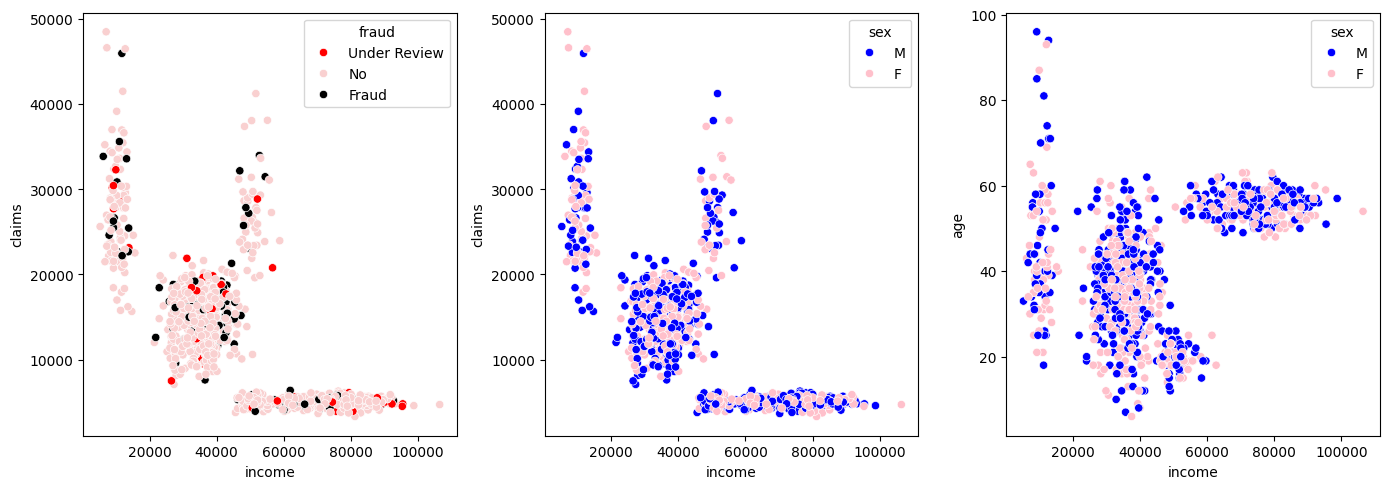

In [10]:
fig,ax=plt.subplots(1,3,figsize=(14,5))

sns.scatterplot(x='income', y='claims', hue='fraud', data=df_data, palette=['red','#F9D0D0','black'],ax=ax[0])
sns.scatterplot(x='income', y='claims', hue='sex', data=df_data,palette=['blue','pink'],ax=ax[1])
sns.scatterplot(x='income', y='age', hue='sex', palette=['blue','pink'],data=df_data,ax=ax[2])
fig.tight_layout()

### Ejercicio 1: (5 min)

¿Qué patrones notas en los gráficos de arriba? ¿Por qué crees que podrían estar sucediendo estas cosas?

**Respuesta.** No parece haber grandes diferencias en las distribuciones basadas en el género; sin embargo, los gráficos independientes del género muestran algunos grupos claros. Por ejemplo, hay un grupo gigante de reclamaciones en torno al rango de ingresos de \\$30 000 - \\$40 000 en el gráfico de reclamaciones versus ingresos, lo que podría deberse al hecho de que el ingreso medio es de aproximadamente \\$30 000 - \\$40 000. También hay una franja de reclamaciones de \\$50 000 a \\$100 000 en el cuadro de reclamaciones versus ingresos, que valen \\$5000 aproximadamente. No está claro exactamente qué son estos reclamos, pero podrían ser cosas cotidianas con las que pueden lidiar las personas más adineradas (por ejemplo, reclamos por accidentes automovilísticos). También hay una serie de reclamaciones por al menos \\$20.000 entre personas que ganan sólo \\$10.000, lo cual es inusual y bien puede consistir en reclamaciones fraudulentas.

En el gráfico de ingresos versus edad, hay una franja de personas que ganan \\$10 000 en todas las edades (salario mínimo), un gran grupo de personas que ganan entre \\$30 000 y \\$40 000 en todas las edades (salario medio) y una muchas personas con ingresos más altos (\\$60,000 - \\$100,0000) justo antes de los 60 años. La edad de 59 años y medio es cuando las personas en los EE. UU. pueden comenzar a retirar ahorros de sus cuentas de jubilación, por lo que esto puede tener algo que ver con este patrón. Además:

1. **¡Vemos que las reclamaciones se dividen en más o menos cuatro grupos!** Estos grupos no tienen etiquetas claras en los datos, por lo que tendríamos que encontrar formas de detectarlos de manera eficiente. Quizás el comportamiento de las reclamaciones fraudulentas cambie dentro de cada grupo.

2. **Los datos sobre fraude están desequilibrados**. ¡Hay más o menos una proporción de 1:8 cuando se trata de reclamos fraudulentos versus legítimos! ¡Por lo tanto, debemos tener mucho cuidado al sacar conclusiones con este conjunto de datos!


## ¿Cuál es el plan?
    
1. Intenta identificar los diferentes conjuntos de grupos que hemos observado. ¡Para esto aprenderemos un algoritmo de agrupamiento!
2. Intente sacar conclusiones dentro de cada grupo para obtener información parcial sobre el conjunto de reclamaciones fraudulentas.

    
Eso suena razonable ¿verdad?

In [11]:
df_data

,case_id,income,age,sex,approval,fraud,claims
0,59982,35750.95,42,M,Approved,Under Review,9518.95
1,87249,24078.27,19,M,Denied,No,19354.23
2,50406,39241.52,37,M,Denied,Fraud,13056.04
3,59391,33248.31,26,M,Approved,No,19238.37
4,96622,38649.96,54,M,Approved,No,14427.42
...,...,...,...,...,...,...,...
995,96947,11353.88,81,M,Approved,No,15781.10
996,87668,8799.08,37,M,Approved,No,37004.41
997,39658,13143.52,35,M,Approved,Fraud,33580.79
998,77914,9473.25,36,F,Denied,No,27975.41


In [12]:
# Let's find the groups across all of our data:

#df = df_data[['case_id', 'income', 'age', 'claims']]

df=df_data[['income', 'age', 'claims']]

#df['sex']=df_data['sex'].astype('category').cat.codes

df.head(5)

,income,age,claims
0,35750.95,42,9518.95
1,24078.27,19,19354.23
2,39241.52,37,13056.04
3,33248.31,26,19238.37
4,38649.96,54,14427.42


<hora>

### Pregunta: (5 min)

¿Cómo harías para crear un algoritmo que encuentre los grupos que hemos determinado mediante la "observación" en las figuras anteriores? Discutir con un compañero.

<hora>

## $k$-means clustering (25 min)

En nuestras visualizaciones anteriores, parecen existir distintas poblaciones de individuos según las relaciones entre reclamaciones de ingresos, e ingresos y edad. Sin embargo, solo hemos logrado investigar dos relaciones de esta manera, y en conjuntos de datos más grandes con muchas características, hacerlo manualmente en todas las variables puede llevar mucho tiempo. Afortunadamente, los **modelos de agrupamiento** nos permiten resumir y detectar relaciones potencialmente interesantes con bastante rapidez.

Hay muchas variaciones de agrupación, pero la más común, y la que veremos, se llama **$k$-means clustering**. Este algoritmo separa el conjunto de datos dado en $k$ grupos que minimizan la suma de los cuadrados de las distancias entre cada par de puntos del grupo. El científico de datos necesita preseleccionar el valor de $k$, lo que puede requerir un análisis previo para determinarlo.

El método consta de 3 pasos amplios, que se pueden resumir de la siguiente manera:

1. Inicialización. Para comenzar, se deben seleccionar $k$ puntos (no necesariamente cualquiera de los puntos de datos, solo puntos en el mismo espacio dimensional) como los centroides "iniciales".
2. Asignación. Cada punto de datos se asigna al grupo correspondiente al centroide más cercano a él (generalmente según la distancia euclidiana estándar).
3. Actualización. Una vez que todos los puntos de datos se han asignado a sus respectivos grupos, se calcula un nuevo centroide para cada grupo tomando la media de todos los puntos de ese grupo.

Luego se repiten los pasos 2 y 3 hasta que los grupos ya no cambien.

## ¡Antes de pasar a la implementación, la siguiente nota es realmente importante!

### Ejercicio 2: (5 min)

La agrupación de $k$-means se basa en minimizar la distancia euclidiana entre puntos de datos. ¿Qué tipo de problemas podría plantear tener multiples tipos de datos con valores diferentes, por ejemplo dinero que gana mensual vs intereses? ¿Cómo podríamos solucionar esto?

**Respuesta.** Podría ocurrir un problema de escala. Si algunas variables naturalmente tienen valores muy pequeños mientras que otras tienen valores muy grandes, entonces las características de facto no se ponderan de manera uniforme en el cálculo de la distancia euclidiana. Para solucionar este problema, necesitaríamos escalar cada variable adecuadamente según una medida de su tamaño; por ejemplo, podríamos dividir todo por el valor mediano de dicha variable.


d:\PROYECTO DIVERSIFICACION DE INGRESOS\Proyecto Ado\CURSO\Notebooks\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


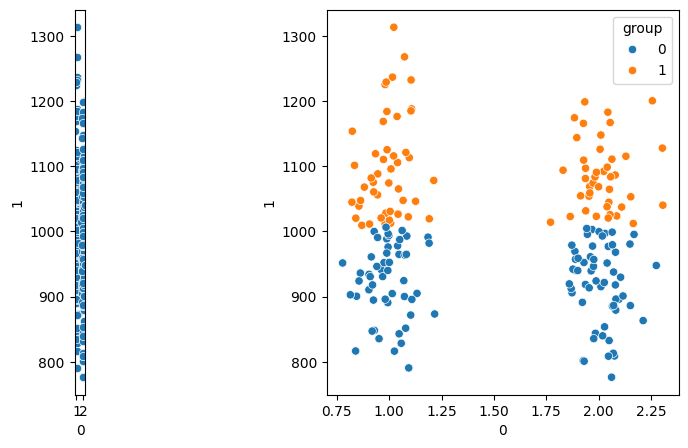

In [13]:
x1=np.random.normal(1,0.1, 100)
x2=np.random.normal(2,0.1, 100)
y1=np.random.normal(1000,100, 100)
y2=np.random.normal(1000,100, 100)
x=np.concatenate((x1,x2))
y=np.concatenate((y1,y2))
weird_data=pd.DataFrame([x,y]).T

k = 2
kmeans0 = KMeans(n_clusters=k, init='k-means++')
kmeans0.fit(weird_data)

# Iterative procedure to learn labels
weird_data['group'] = kmeans0.predict(weird_data)

fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(x=0, y=1, data=weird_data,ax=ax[0])
sns.scatterplot(x=0, y=1, hue='group', data=weird_data,ax=ax[1])
ax[0].set_aspect(.1)

d:\PROYECTO DIVERSIFICACION DE INGRESOS\Proyecto Ado\CURSO\Notebooks\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='x', ylabel='y'>

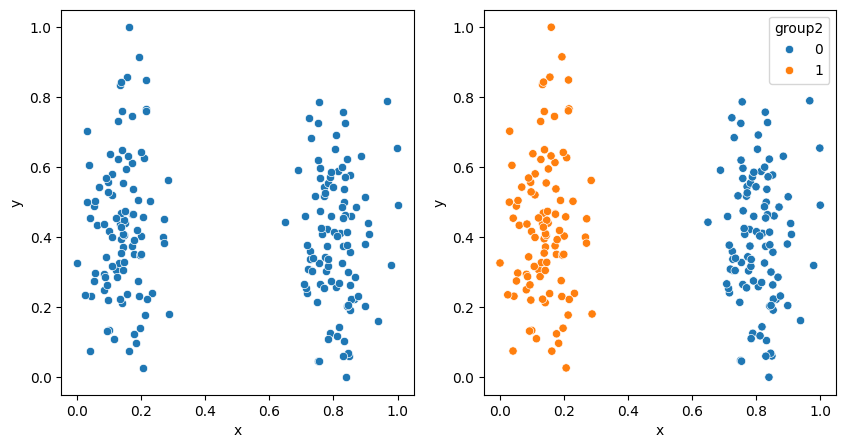

In [14]:
weird_data['x']=(weird_data[0]-weird_data[0].min())/(weird_data[0].max()-weird_data[0].min())
weird_data['y']=(weird_data[1]-weird_data[1].min())/(weird_data[1].max()-weird_data[1].min())
k = 2
kmeans1 = KMeans(n_clusters=k, init='k-means++')
kmeans1.fit(weird_data[['x','y']])

# Iterative procedure to learn labels
weird_data['group2'] = kmeans1.predict(weird_data[['x','y']])

fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(x='x', y='y', data=weird_data,ax=ax[0])
sns.scatterplot(x='x', y='y', hue='group2', data=weird_data,ax=ax[1])

Hay muchas formas de escalar o **normalizar** variables, una de las cuales hemos mencionado anteriormente. La mejor opción de normalización depende de los detalles particulares del conjunto de datos en cuestión.

De manera similar, la distancia euclidiana es la métrica más utilizada para calcular los conglomerados, ya que es bastante fácil de calcular y funciona bien en la mayoría de los conjuntos de datos, pero no es la única. Los científicos de datos a veces utilizan variaciones en la métrica de distancia según el conjunto de datos que están investigando. Por lo tanto, es un parámetro que debe ser considerado y explorado durante la etapa EDA para determinar qué es mejor proceder.

### Ejercicio 3: (10 min)

Escriba una función que normalice `age`, `income`, and `claims` de acuerdo con los valores mínimo y máximo de cada variable. Por ejemplo, si estamos hablando de `age`, entonces un valor normalizado para una edad $A$ se calcularía como $\displaystyle\frac {X - min(age)} {max(age) - min(age)}$ (Esto se conoce como método de escala mínimo-máximo).

**Respuesta.** A continuación se muestra una posible solución:

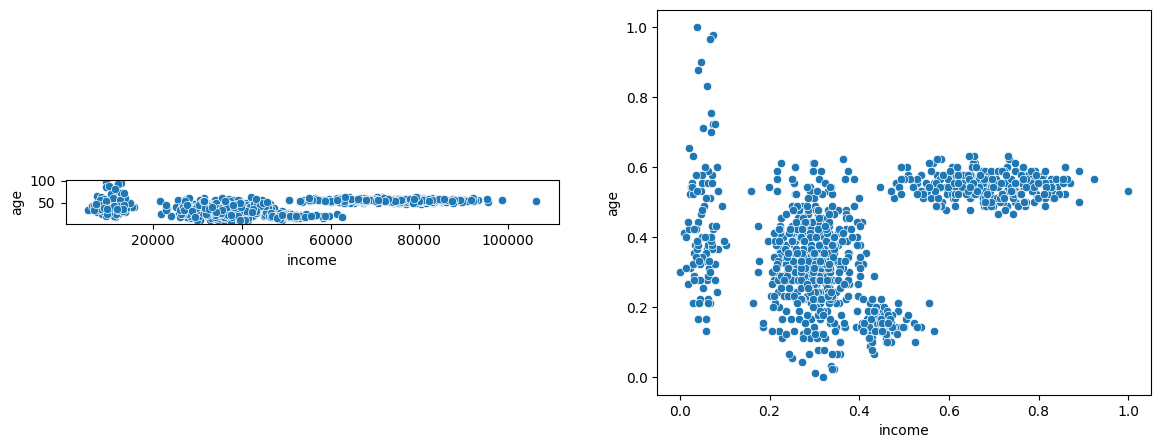

In [15]:
# Function Normalize
# Input = df, DataFrame we are interested in normalizing
# This is the Min/Max scaling method

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_val = df[feature_name].max()
        min_val = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_val) / (max_val - min_val)

    return result
df_norm=normalize(df)

fig,ax=plt.subplots(1,2,figsize=(14,5))

sns.scatterplot(x='income', y='age',data=df_data, ax=ax[0])
sns.scatterplot(x='income', y='age',data=df_norm, ax=ax[1])
ax[0].set_aspect(100)

Los métodos mostrados arriba transformarán los datos de tal manera que la magnitud de todas las características sea aproximadamente similar. Sin embargo, puede haber un método de escalado diferente que permita que la agrupación de $k$-means funcione mejor. La mejor elección del método de escala depende de los datos específicos proporcionados.

## Pero antes de continuar.... Nos falta aplicar PCA

Ya que visualizamos todos los datos y que además los normalizamos, es necesario que implementacion la reduccion de dimensionalidad en el ejemplo.

Recordemos que :

- Si el conjunto de datos tiene muchas características, PCA puede reducir la dimensionalidad al identificar las características más importantes que explican la mayor parte de la variabilidad en los datos. Esto puede ser útil para visualizar los datos en un espacio de menor dimensión y para acelerar los algoritmos de clustering, como k-means, que pueden ser sensibles a la maldición de la dimensionalidad.


- Y si las características están altamente correlacionadas entre sí, PCA puede ayudar a reducir esta multicolinealidad al transformar las características originales en un conjunto de nuevas características no correlacionadas (los componentes principales), lo que puede mejorar la estabilidad y la interpretación de los resultados del clustering.

Entonces apliquemos pca a nuestro conjunto de datos y miremos cuanto porcentaje de los datos logramos explicar despues de la reduccion:

Porcentaje de Varianza Explicada por cada Componente Principal:
[0.78617611 0.21382389]
Porcentaje de Varianza Total Explicada: 100.00%


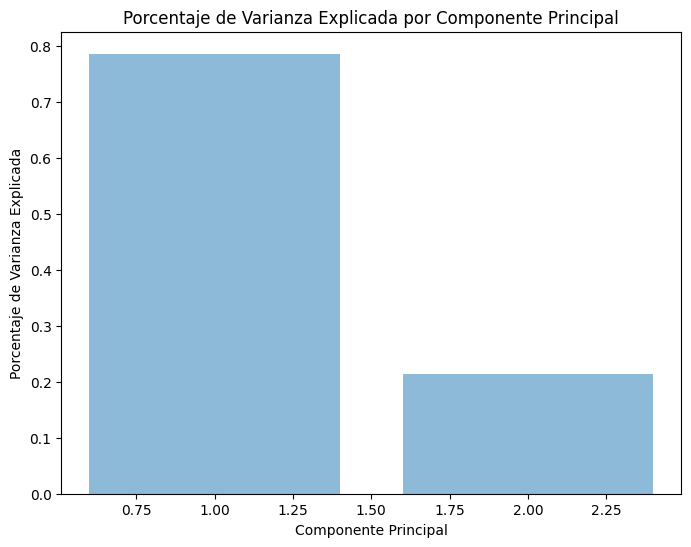

In [31]:
from sklearn.decomposition import PCA

# Preprocesamiento con PCA
pca = PCA(n_components=2)  # Por ejemplo, reducir a 2 componentes principales
df_pca_fit = pca.fit_transform(df_norm)

# Porcentaje de varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_

print("Porcentaje de Varianza Explicada por cada Componente Principal:")
print(explained_variance_ratio)

# Porcentaje de varianza total explicada
total_variance_explained = sum(explained_variance_ratio) * 100
print(f"Porcentaje de Varianza Total Explicada: {total_variance_explained:.2f}%")

# Visualización del porcentaje de varianza explicada
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.xlabel('Componente Principal')
plt.ylabel('Porcentaje de Varianza Explicada')
plt.title('Porcentaje de Varianza Explicada por Componente Principal')
plt.show()



### ¿Qué significa que el porcentaje varianza sea 90.34%?

Esto implica que las características originales están altamente correlacionadas entre sí y que la mayoría de la información contenida en estas características se captura de manera efectiva en un espacio de dimensionalidad reducida definido por las componentes principales.

En la práctica, un alto porcentaje de varianza explicada (por ejemplo, mayor al 90%) sugiere que la reducción de dimensionalidad mediante PCA ha sido efectiva para capturar la estructura subyacente de los datos con un número mucho menor de características, lo que puede simplificar el análisis y hacer que los datos sean más manejables y fáciles de interpretar.

## ¿Qué método de escalamiento deberíamos utilizar para nuestros datos?

## Ejercicio 4: (5 min)

Imagine una situación en la que, además de nuestro conjunto de datos original, hubiera algunas personas con ingresos altos que también presentaran reclamaciones de alto valor. ¿Qué podría salir mal con nuestro método de escalado anterior? ¿Cómo podrías lidiar con esto?

**Respuesta.** Estos puntos de datos se presentarían en la parte superior derecha de nuestro gráfico de reclamaciones versus ingresos y, por lo general, serían sucesos únicos (es decir, no frecuentes). Sin embargo, afectarían significativamente nuestro método de escalamiento mínimo-máximo (de manera muy similar a cómo los valores atípicos afectan significativamente a los modelos de regresión) y, por lo tanto, nuestro proceso de agrupación.

Una solución sería omitir estos puntos de datos, ya que no ocurren con demasiada frecuencia (una explicación plausible es que los datos pueden haberse ingresado accidentalmente con un 0 adicional, inflando así sus valores). Sin embargo, eliminar puntos de datos de la consideración es un gran paso y una opción que generalmente no queremos usar si podemos evitarlo. En general, nos gustaría utilizar procedimientos de escalamiento más sólidos que puedan abordar naturalmente estos valores atípicos. Una forma de escalar generalmente aceptada es dividir por la desviación estándar.


### Esto se explica mejor con un ejemplo:

d:\PROYECTO DIVERSIFICACION DE INGRESOS\Proyecto Ado\CURSO\Notebooks\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='0', ylabel='1'>

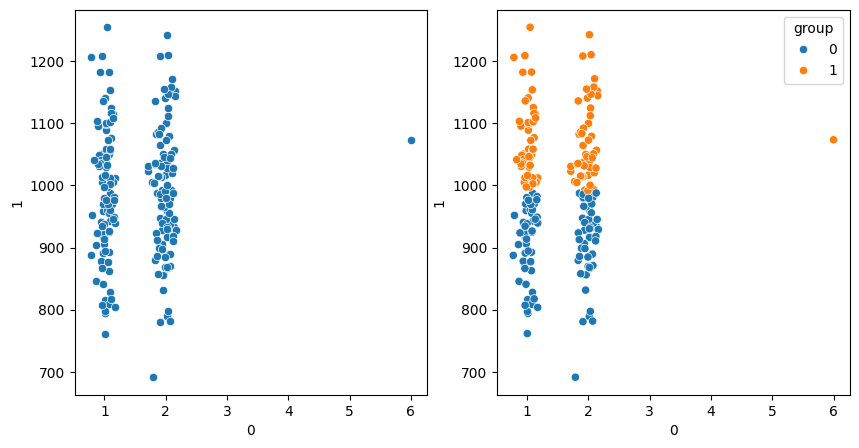

In [20]:
x1=np.random.normal(1,0.1, 100)
x2=np.random.normal(2,0.1, 100)
y1=np.random.normal(1000,100, 100)
y2=np.random.normal(1000,100, 100)
x=np.concatenate((x1,x2))
y=np.concatenate((y1,y2))
weird_data2=pd.DataFrame([x,y]).T

weird_data2.iloc[0,0]=6

k = 2
kmeans3 = KMeans(n_clusters=k, init='k-means++')
kmeans3.fit(weird_data2)

# Iterative procedure to learn labels
weird_data2['group'] = kmeans3.predict(weird_data2)

fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(x=0, y=1, data=weird_data2,ax=ax[0])
sns.scatterplot(x=0, y=1, hue='group', data=weird_data2,ax=ax[1])
#ax[0].set_aspect(.1)

d:\PROYECTO DIVERSIFICACION DE INGRESOS\Proyecto Ado\CURSO\Notebooks\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='x', ylabel='y'>

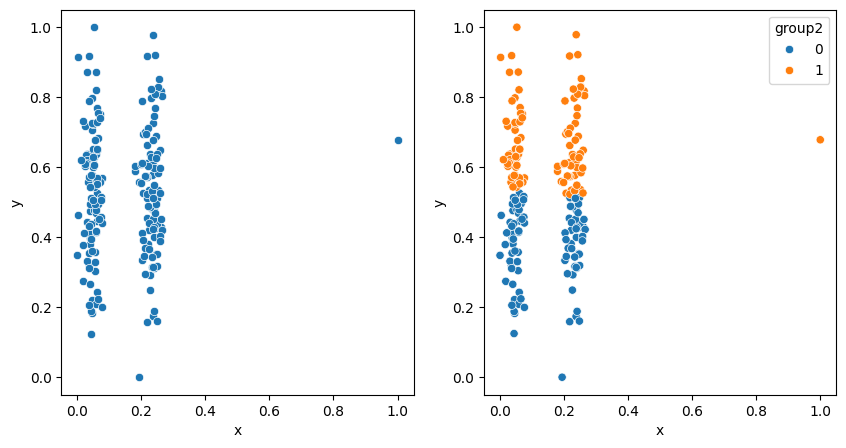

In [22]:
weird_data2['x']=(weird_data2[0]-weird_data2[0].min())/(weird_data2[0].max()-weird_data2[0].min())
weird_data2['y']=(weird_data2[1]-weird_data2[1].min())/(weird_data2[1].max()-weird_data2[1].min())
k = 2
kmeans4 = KMeans(n_clusters=k, init='k-means++')
kmeans4.fit(weird_data2[['x','y']])

# Iterative procedure to learn labels
weird_data2['group2'] = kmeans4.predict(weird_data2[['x','y']])

fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(x='x', y='y', data=weird_data2,ax=ax[0])
sns.scatterplot(x='x', y='y', hue='group2', data=weird_data2,ax=ax[1])

d:\PROYECTO DIVERSIFICACION DE INGRESOS\Proyecto Ado\CURSO\Notebooks\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='x', ylabel='y'>

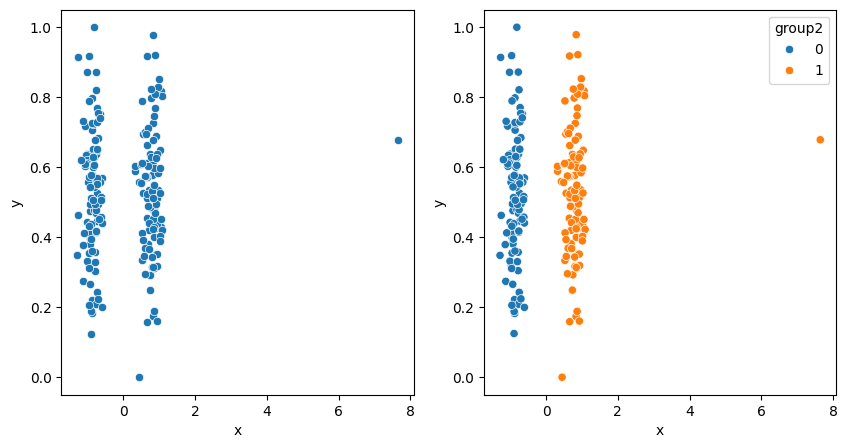

In [23]:
weird_data2['x']=(weird_data2[0]-weird_data2[0].mean())/weird_data2[0].std()
weird_data2['y']=(weird_data2[1]-weird_data2[1].min())/(weird_data2[1].max()-weird_data2[1].min())
k = 2
kmeans5 = KMeans(n_clusters=k, init='k-means++')
kmeans5.fit(weird_data2[['x','y']])

# Iterative procedure to learn labels
weird_data2['group2'] = kmeans5.predict(weird_data2[['x','y']])

fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(x='x', y='y', data=weird_data2,ax=ax[0])
sns.scatterplot(x='x', y='y', hue='group2', data=weird_data2,ax=ax[1])

## Inicializando el cluster (25 min)

In [34]:
# Crea un DataFrame con los componentes principales
df_pca = pd.DataFrame(data=df_pca_fit, columns=['PC1', 'PC2'])  

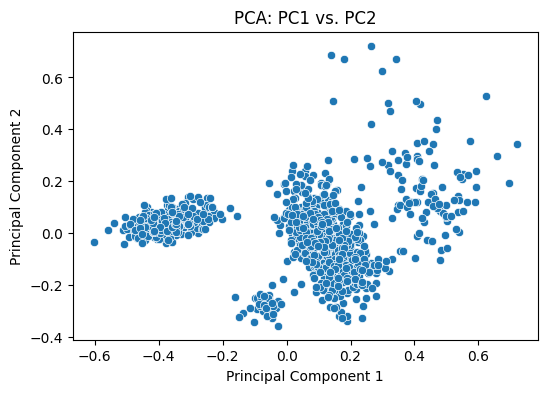

In [40]:
# Crear la figura y el subplot
plt.figure(figsize=(6, 4))

# Graficar PC1 vs. PC2
sns.scatterplot(x='PC1', y='PC2', data=df_pca)

# Configurar etiquetas y título
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: PC1 vs. PC2')

# Mostrar la gráfica
plt.show()


Con base en los datos normalizados, podemos hacer una suposición fundamentada de que tenemos 4 grupos:

1. Altos ingresos y bajos reclamos
2. Ingresos moderados y reclamaciones moderadas.
3. Ingresos moderados y altas demandas
4. Bajos ingresos y elevadas reclamaciones

Investiguemos más a fondo para determinar si esta es la mejor manera de agrupar los datos. Debemos empezar inicializando los primeros valores de los centroides:

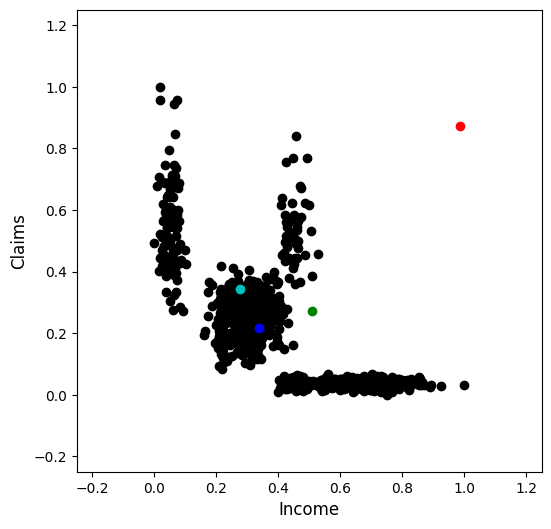

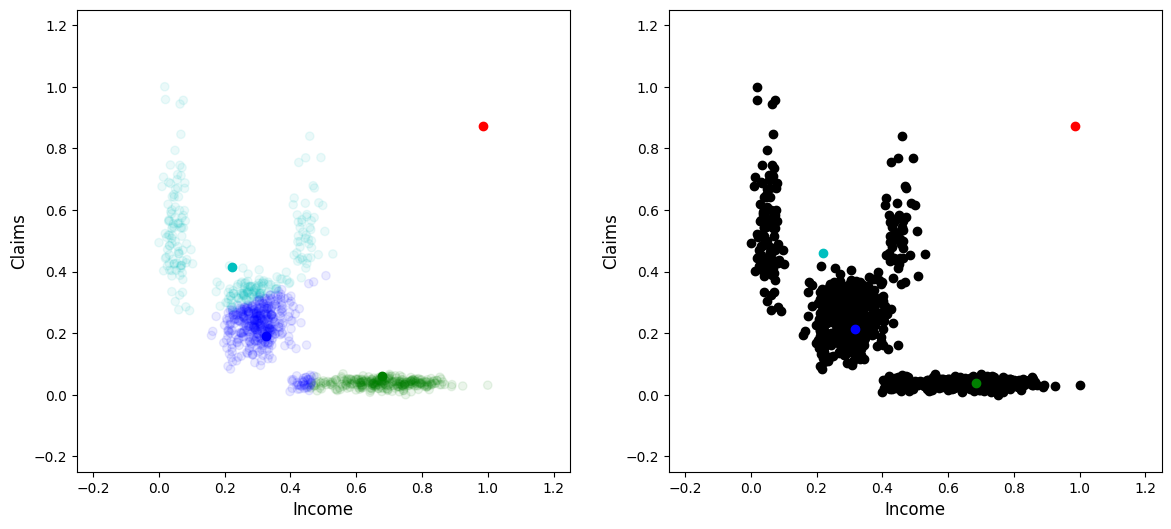

Aquí, hemos implementado una inicialización burda de los medios del clúster. En nuestro ejemplo anterior, nuestros grupos iniciales estaban bien posicionados y pudimos encontrar resultados razonablemente buenos después de solo dos iteraciones (al menos si solo tomamos en cuenta los "ingresos" y las "reclamaciones"). Sin embargo, el algoritmo puede ser bastante sensible a la inicialización (por ejemplo, intente cambiar la semilla aleatoria a 2020; el centroide rojo termina estando demasiado lejos para que el clasificador funcione como se esperaba). Afortunadamente para nosotros, el paquete `KMeans` de `sklearn` ya tiene la inicialización preestablecida para un método más sofisticado: `k-means++`.

La idea principal detrás del algoritmo de inicialización de `k-means++` es establecer los centroides iniciales como puntos aleatorios en nuestro conjunto de datos que se espera que estén bien distanciados entre sí. Más concretamente:

1. Seleccione un centroide $c_1$ al azar de nuestro conjunto de datos.
2. Calcule la distancia al cuadrado de cada otro punto en el conjunto de datos hasta $c_1$ y elija aleatoriamente el segundo centroide $c_2$ de acuerdo con las distancias observadas (cuanto mayor sea la distancia al cuadrado, mayor será la posibilidad de elegir el punto como centroide) .
3. Repetimos el mismo procedimiento con los centroides posteriores, pero en su lugar los elegimos aleatoriamente según la distancia al cuadrado al más cercano de los centroides ya seleccionados.

Se ha demostrado que este algoritmo es una [buena aproximación] (http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf) a la solución óptima de $k$-medias. Por tanto, es un muy buen comienzo para el algoritmo principal. Trabajaremos con esto de ahora en adelante.

### Implementación de $k$-means usando `sklearn` (5 min)

In [27]:
from sklearn.cluster import KMeans

k = 4

kmeans = KMeans(n_clusters=k, init='k-means++')
kmeans.fit(df_norm)

# Iterative procedure to learn labels
labels = kmeans.predict(df_norm)
centroids = kmeans.cluster_centers_

d:\PROYECTO DIVERSIFICACION DE INGRESOS\Proyecto Ado\CURSO\Notebooks\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# Plot the data learned
plt.figure(figsize=(12, 12))

color_map = {1:'r', 2:'g', 3:'b' , 4:'c', 5:'y', 6:'w'}
colors = [color_map[x+1] for x in labels]

plt.scatter(df_norm['income'], df_norm['claims'], color=colors, alpha=0.4, edgecolor='k')

for idx, centroid in enumerate(centroids):
    plt.scatter(centroid[0],centroid[2], marker='*', edgecolor='k')

plt.xlim(-0.25, 1.25)
plt.xlabel('Income', fontsize=12)
plt.xticks(fontsize=12)

plt.ylim(-0.25, 1.25)
plt.ylabel('Claims', fontsize=12)
plt.yticks(fontsize=12)

plt.title('K-means Clustering after Convergence', fontsize=16)

plt.show()

d:\PROYECTO DIVERSIFICACION DE INGRESOS\Proyecto Ado\CURSO\Notebooks\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


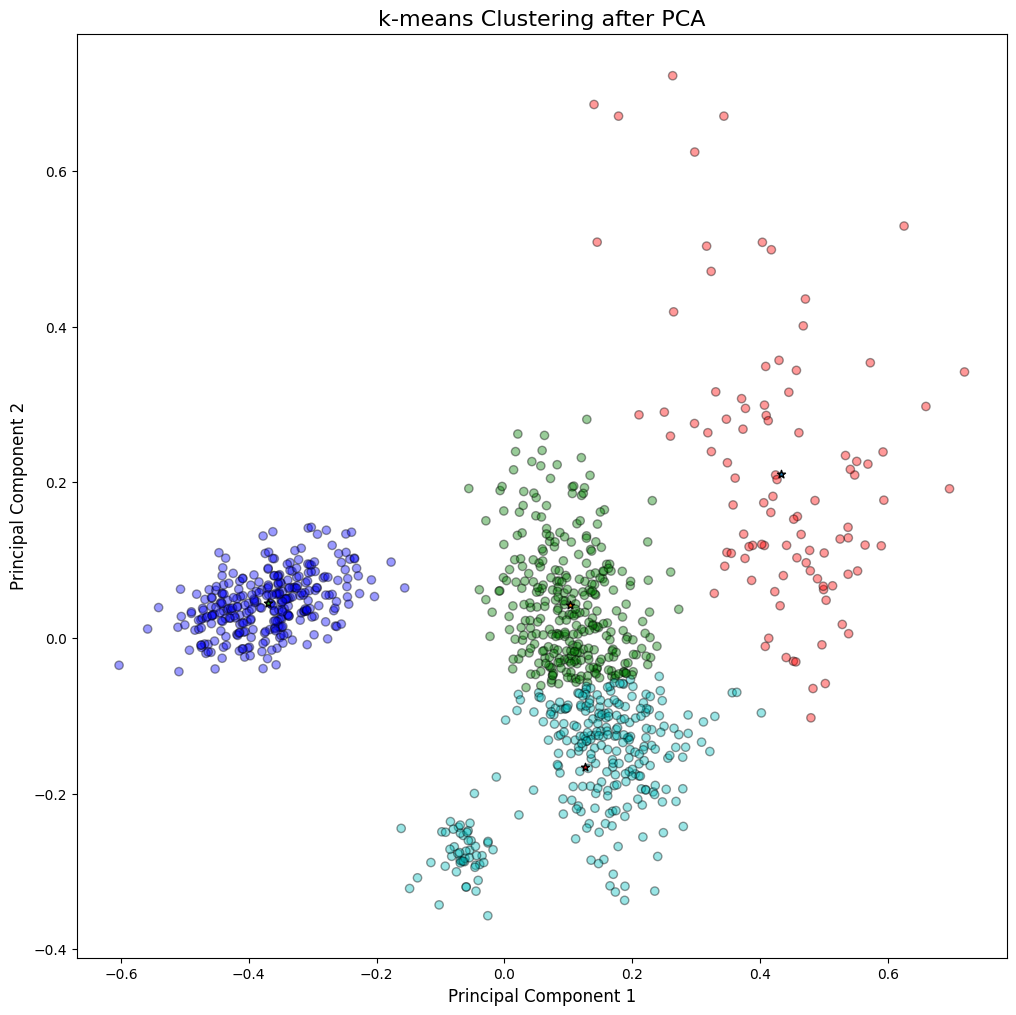

In [41]:
from sklearn.cluster import KMeans

# Aplicar k-means en los datos transformados
k = 4  # Número de clusters deseado
kmeans_pca = KMeans(n_clusters=k, init='k-means++')
kmeans_pca.fit(df_pca)

# Iterative procedure to learn labels
labels_pca = kmeans_pca.predict(df_pca)
centroids_pca = kmeans_pca.cluster_centers_

# Plot the data learned
plt.figure(figsize=(12, 12))

color_map = {1:'r', 2:'g', 3:'b', 4:'c', 5:'y', 6:'w'}
colors_pca = [color_map[x+1] for x in labels_pca]

plt.scatter(df_pca['PC1'], df_pca['PC2'], color=colors_pca, alpha=0.4, edgecolor='k')

for idx, centroid in enumerate(centroids_pca):
    plt.scatter(centroid[0],centroid[1], marker='*', edgecolor='k')

plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.title('k-means Clustering after PCA', fontsize=16)

plt.show()


## Seleccionando el valor optimo de $k$ (25 min)

Aunque el análisis visual sugiere que $k = 4$ es el valor óptimo, es una buena práctica verificarlo cuantitativamente en lugar de simplemente observarlo. Esto es especialmente importante cuando se agrupan datos que no se pueden visualizar fácilmente, algo que ocurre con frecuencia con datos multidimensionales complejos.

### Ejercicio 6: (5 min)

¿Cómo podría construir un método cuantitativo para determinar el $k$ óptimo?

**Respuesta.** Dado que el algoritmo $k$-means minimiza la suma de cuadrados dentro de cada grupo, esta es la función objetivo con la que debemos comparar todos los valores posibles de $k$. Podemos construir un gráfico lineal que muestre cómo esta suma de cuadrados cambia a medida que cambia $k$ y luego seleccionar el valor de $k$ con el valor más bajo.

Sin embargo, este método no funciona del todo; imagine el caso en el que tiene el mismo número de clústeres como puntos de datos. Entonces la suma de cuadrados es obviamente cero, ¡pero difícilmente se podría argumentar que tal agrupamiento sea una buena idea! Por lo tanto, es prudente agregar un término de penalización (similar a cómo la métrica AIC contiene un término de penalización) correspondiente al valor de $k$. Esto permitirá que nuestro gráfico toque fondo mucho antes de que $k$ sea demasiado grande, ya que el beneficio incremental de agregar solo un grupo más disminuye a medida que $k$ crece, mientras que la penalización incremental aumenta.

El método descrito en el Ejercicio 5 es una forma de **regularización**; sin embargo, todavía no estamos preparados para llegar allí. Por ahora, seremos un poco poco científicos al respecto, y en su lugar omitiremos el término de penalización y buscaremos el valor de $k$ en el gráfico lineal más allá del cual el cambio en la suma de cuadrados es efectivamente insignificante. Esto se llama **método del codo** o **elbow method**.

### Ejercicio 7: (10 min)

Implemente el esquema del método del codo que describimos anteriormente. ¿Nuestra suposición inicial de $k$ parece correcta?

d:\PROYECTO DIVERSIFICACION DE INGRESOS\Proyecto Ado\CURSO\Notebooks\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\PROYECTO DIVERSIFICACION DE INGRESOS\Proyecto Ado\CURSO\Notebooks\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\PROYECTO DIVERSIFICACION DE INGRESOS\Proyecto Ado\CURSO\Notebooks\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\PROYECTO DIVERSIFICACION DE 

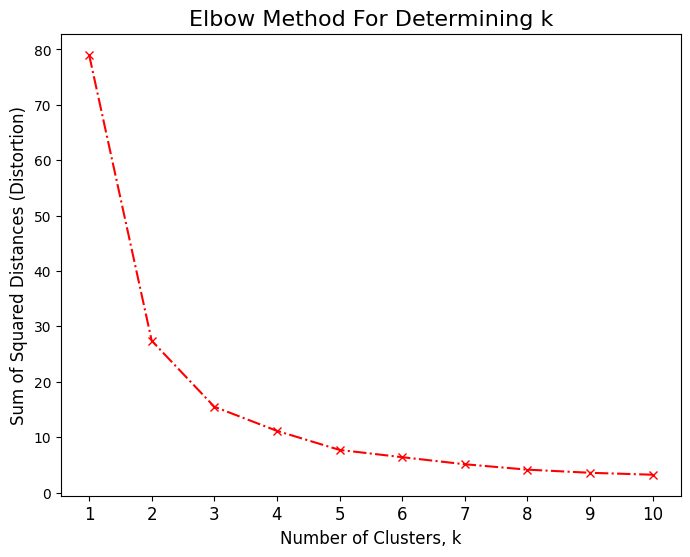

In [38]:
sum_sq_d = []
K = range(1,11)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_norm[['income', 'claims']])
    sum_sq_d.append(km.inertia_)

plt.figure(figsize=(8,6))

plt.plot(K, sum_sq_d, 'rx-.')

plt.xlabel('Number of Clusters, k', fontsize=12)
plt.xticks(range(1,11), fontsize=12)

plt.ylabel('Sum of Squared Distances (Distortion)', fontsize=12)
plt.xticks(fontsize=12)

plt.title('Elbow Method For Determining k', fontsize=16)

plt.show()



Del gráfico parecería que el valor de agregar más clústeres realmente comienza a disminuir alrededor de $k = 3$. $k = 4$ está muy cerca de eso, por lo que podemos decir que nuestra suposición inicial fue acertada (es bastante común que nuestra suposición visual y el resultado del método anterior sean ligeramente diferentes). Recuerde, este método funciona en múltiples dimensiones, por lo que, si bien la agrupación puede ser obvia en una dimensión, puede desaparecer cuando se combina con más variables.

# ¡Volvamos al problema original!
    
Muy bien, como prometimos, ahora tenemos una respuesta más informada sobre los tipos de grupos que tenemos en nuestros datos. Ahora, veamos si podemos detectar algún patrón para las reclamaciones fraudulentas dentro de cada grupo.

In [39]:
labels

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,

In [40]:
df_final=df_data.copy()
df_final['group']=labels
df_final.head(10)

,case_id,income,age,sex,approval,fraud,claims,group
0,59982,35750.95,42,M,Approved,Under Review,9518.95,1
1,87249,24078.27,19,M,Denied,No,19354.23,0
2,50406,39241.52,37,M,Denied,Fraud,13056.04,1
3,59391,33248.31,26,M,Approved,No,19238.37,0
4,96622,38649.96,54,M,Approved,No,14427.42,1
5,56519,39001.26,43,F,Denied,No,14659.06,1
6,89783,36862.26,46,F,Approved,No,11390.09,1
7,99992,42827.23,47,F,Denied,No,17272.75,1
8,40096,34838.49,25,M,Approved,No,13164.17,0
9,1710,34714.20,27,F,Approved,No,11267.48,0


<Axes: xlabel='income', ylabel='claims'>

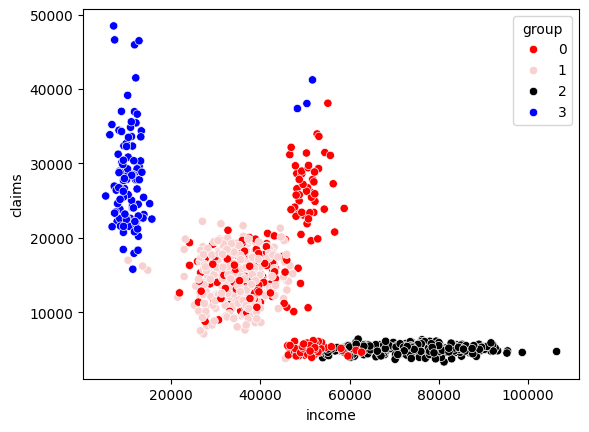

In [41]:
sns.scatterplot(x='income', y='claims', data=df_final,hue='group', palette=['red','#F9D0D0','black','blue'] )

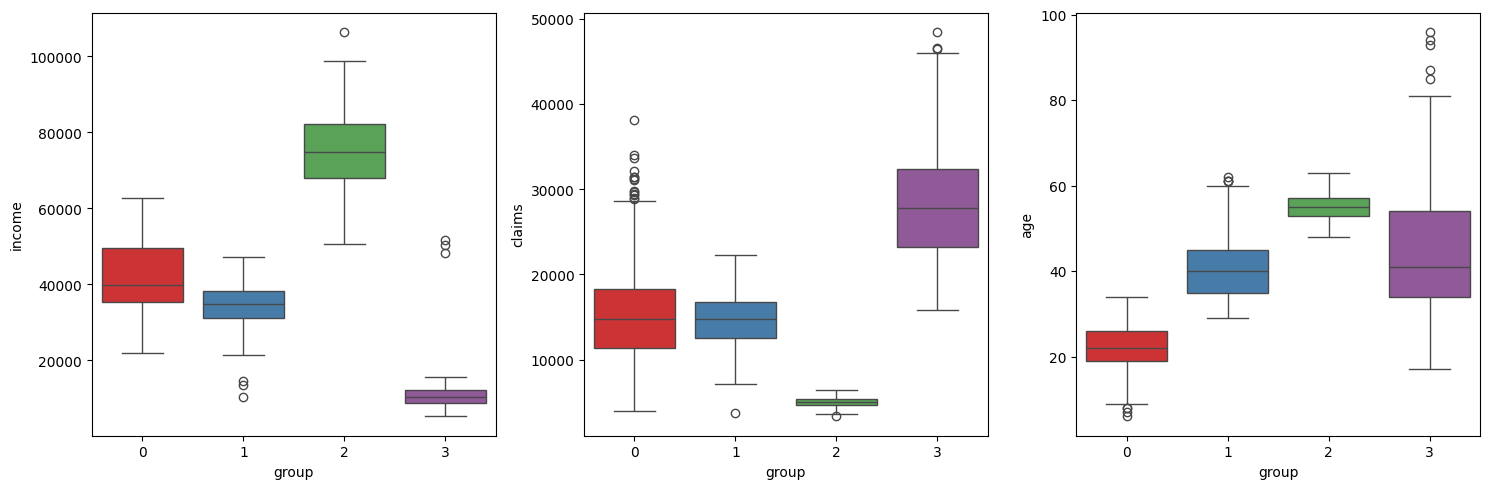

In [48]:
"""fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.boxplot(x='group', y='income',data=df_final,ax=ax[0])
sns.boxplot(x='group', y='claims', data=df_final,ax=ax[1])
sns.boxplot(x='group', y='age',data=df_final,ax=ax[2])
fig.tight_layout()"""

# Crear los boxplots con la asignación de hue y legend=False
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x='group', y='income', data=df_final, ax=ax[0], hue='group', palette='Set1', legend=False)
sns.boxplot(x='group', y='claims', data=df_final, ax=ax[1], hue='group', palette='Set1', legend=False)
sns.boxplot(x='group', y='age', data=df_final, ax=ax[2], hue='group', palette='Set1', legend=False)
fig.tight_layout()

>**Grupo 0**. Personas de casi todas las edades, con ingresos moderadamente bajos (20.000-50.000) y reclamaciones de entre 5.000 y 25.000 dólares. Puede no suponer mayor peligro en caso de fraude.
    
>**Grupo 1**. Personas de entre 50 y 60 años, con altos ingresos y bajos reclamos. Los fraudes aquí podrían no ser tan problemáticos.
    
>**Grupo 2**. Personas con bajos ingresos, menos de 20 mil y siniestros comparativamente altos. ¡En su mayoría adultos y podrían representar un riesgo si hay fraudes aquí!
    
>**Grupo 3**. Profesionales adultos jóvenes (ingresos moderados altos, alrededor de 50.000), pero con reclamaciones relativamente altas. Puede representar un peligro aquí también, aunque menos que el Grupo 2 en mi opinión.
    
Echemos un vistazo al mismo gráfico, esta vez teniendo en cuenta la columna de fraude:

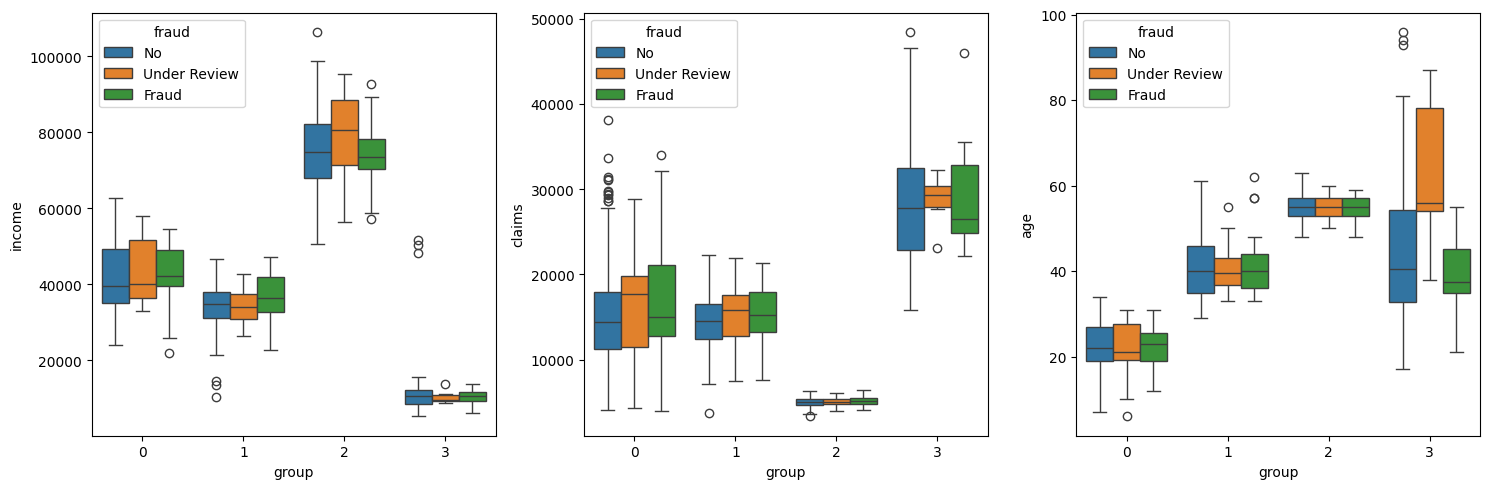

In [49]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.boxplot(x='group', y='income', hue='fraud',data=df_final,ax=ax[0])
sns.boxplot(x='group', y='claims', hue='fraud',data=df_final,ax=ax[1])
sns.boxplot(x='group', y='age', hue='fraud',data=df_final,ax=ax[2])
fig.tight_layout()

>Para el Grupo 0, vemos que ocurren varios fraudes con personas con ingresos más altos y reclamos más altos. Podemos intentar utilizar algunos de nuestros conocimientos sobre algoritmos de clasificación para validar esto.
    
> Para el Grupo 1, esto no está tan claro en mi opinión, al menos en estos gráficos. Parece que se están produciendo fraudes entre personas con ingresos de entre 60 y 80 mil.
    
>Para los otros dos grupos los fraudes son un poco más esporádicos y probablemente necesitaremos más datos para sacar conclusiones aquí, ¡especialmente porque estos dos tipos de reclamaciones pueden ser riesgosos!    

### Ejercicio 8 (5 min):

Dados los cuatro grupos de reclamos que identificamos con base en el cuadro de ingresos versus reclamos, y teniendo en cuenta la información en el cuadro de ingresos versus edad, haga una sugerencia sobre lo que el departamento debería hacer con cada grupo.

**Respuesta.** Tenemos cuatro grupos. El primero son aquellos con ingresos altos y reclamos bajos, que probablemente sean reclamos ordinarios presentados por familias adineradas. Es muy probable que no sean fraudulentos y que la empresa deba aceptarlos. El segundo son los ingresos moderados con valores de demanda moderados. Estos son bastante abundantes y podrían ser artículos cotidianos, como reclamos de automóviles. Lo más probable es que debamos aceptarlos. El tercero son los ingresos moderados y los elevados siniestros. Esto podría ser plausible si es algo que las personas de ingresos medios necesitan pero que no siempre pueden permitirse, como ciertas declaraciones de propiedades saludables. Entonces probablemente deberíamos investigar esto más a fondo. La última categoría son los ingresos bajos pero las reclamaciones muy elevadas. Claramente, estos no son asequibles y, con la excepción de algo como las declaraciones de propiedades saludables, bien podrían ser intentos de obtener dinero gratis. Lo más probable es que deberíamos rechazarlos.

### Ejercicio 9 (5 min):

Dado lo que ha aprendido sobre el algoritmo $k$-means, ¿cuáles son algunos de los posibles inconvenientes cuando se aplica a conjuntos de datos?

**Respuesta.** Existen algunas deficiencias potenciales (estos son ejemplos, obviamente hay otras respuestas posibles):

1. El algoritmo $k$-means da más peso a los grupos más grandes, ya que intenta minimizar la variación dentro del grupo, por lo que en los casos en que los grupos naturalmente no son del mismo tamaño, esto podría dar como resultado resultados sesgados.
2. No necesariamente converge de manera uniforme o rápida, por lo que elegir los puntos iniciales es sumamente importante. Este grado de dependencia no es necesariamente ideal.
3. Los valores atípicos pueden influir en gran medida en los datos y las medias de los grupos, a menos que se utilice una métrica alternativa.
4. El preprocesamiento de los datos y la normalización juegan un papel fundamental en los resultados modelos.

## Conclusiones (3 min)

En este caso, dividimos con éxito el conjunto de datos en 4 grupos separados y validamos nuestra intuición basada en la agrupación de $k$-medias. Aprendimos que hay muchas suposiciones incorporadas en la agrupación de $k$-medias (es decir, la elección de la métrica de distancia, la normalización y $k$) y que esto no se puede automatizar fácilmente, ya que estas elecciones dependen del conjunto de datos particular en el que se encuentran. mano. Una vez que se han identificado los grupos individuales, la compañía de seguros ahora puede determinar qué reclamaciones investigar más a fondo o considerar inmediatamente fraudulentas basándose en algunos criterios adicionales.

## Takeaways (5 min)

En este caso, introdujimos los conceptos de **aprendizaje no supervisado** y técnicas de **agrupación**. En particular, analizamos el algoritmo **$k$-means** y su funcionamiento interno. Hicimos esto por:

1. Visualizar un conjunto de datos para generar posibles clusters en nuestros datos
2. Presentamos el concepto de $k$-medios y cómo funciona el algoritmo.
3. Modificar los datos para ajustarlos a los errores del algoritmo.
4. Validar nuestra hipótesis inicial de los clusters en los datos implementando el algoritmo.
5. Probar otro nuevo modelo de clusterización representa ir a la página de modelos y seleccionar uno nuevo. #

La agrupación en clústeres es una poderosa herramienta de aprendizaje no supervisada para investigar datos no etiquetados, en particular para determinar patrones que no se conocían ni comprendían previamente. En el caso de grandes conjuntos de datos, se pueden identificar relaciones muy complejas entre grupos de puntos de datos individuales que no serían posibles a través del ojo humano.

Si bien esta es una buena técnica para datos de baja dimensión, $k$-means es susceptible a un rendimiento deficiente en dimensiones superiores, como muchos algoritmos de aprendizaje automático. En dimensiones superiores, primero se realizan técnicas más avanzadas, como **t-SNE**, para reducir el número de dimensiones antes de agruparlas. Finalmente, $k$-means es sólo uno de muchos algoritmos de agrupación. Los desarrollos modernos incluyen los algoritmos **DBSCAN** y **OPTICS**.